<center><h1>TITANIC CHALLENGE</h1></center>

<h1>Table of content</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#retrieve_the_data">RETRIEVE DATA</a></li>
    <li>DATA WRANGLING
        <ol>
            <li>Identify and handle missing data</li>
            <li>Deal with missing data</li>
            <li>Data formatting</li>
            <li>Data standardization</li>
            <li>Data Normalization</li>
            <li>Binning</li>
        </ol>
    </li>
</ol>
</div>
 
<hr>

<h2 id="retrieve_the_data">1 - RETRIEVE THE DATA</h2>

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [132]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


df_train = df_train[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
df_test = df_test[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]

df = pd.concat([df_train, df_test], sort=False)

df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [133]:
#Remove non useful data
df.drop("Ticket", axis = 1, inplace=True)
df.drop("Cabin", axis = 1, inplace=True)
df.drop("Name", axis = 1, inplace=True)
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,female,38.0,1,0,71.2833,C,1.0
2,3,3,female,26.0,0,0,7.9250,S,1.0
3,4,1,female,35.0,1,0,53.1000,S,1.0
4,5,3,male,35.0,0,0,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,NaN
414,1306,1,female,39.0,0,0,108.9000,C,NaN
415,1307,3,male,38.5,0,0,7.2500,S,NaN
416,1308,3,male,NaN,0,0,8.0500,S,NaN


In [134]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


<h3>Variable Notes</h3>

<b>pclass:</b> A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

<b>age:</b> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp:</b> The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch:</b> The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

<h2 id="data_wrangling">2 - DATA WRANGLING</h2>

<h3>Identification of missing data</h3>

In [135]:
missing_data = df.isnull()
missing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
413,False,False,False,True,False,False,False,False,True
414,False,False,False,False,False,False,False,False,True
415,False,False,False,False,False,False,False,False,True
416,False,False,False,True,False,False,False,False,True


In [136]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

PassengerId
False    1309
Name: PassengerId, dtype: int64

Pclass
False    1309
Name: Pclass, dtype: int64

Sex
False    1309
Name: Sex, dtype: int64

Age
False    1046
True      263
Name: Age, dtype: int64

SibSp
False    1309
Name: SibSp, dtype: int64

Parch
False    1309
Name: Parch, dtype: int64

Fare
False    1308
True        1
Name: Fare, dtype: int64

Embarked
False    1307
True        2
Name: Embarked, dtype: int64

Survived
False    891
True     418
Name: Survived, dtype: int64



<h3>Deal with missing data</h3>

<b>Age :</b> Replace age with mean value.<br>
<b>Embarked :</b> Replace by total frequency.<br>
<b>Fare :</b> Replace fare with mean value.

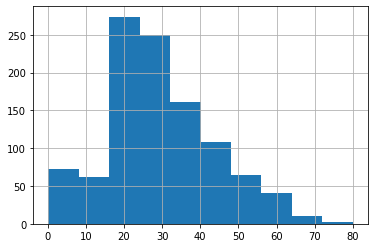

In [137]:
df['Age'].hist()

In [138]:
average_age = df['Age'].mean(axis=0)
df['Age'].replace(np.nan, average_age, inplace = True)

In [139]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [140]:
df['Embarked'].replace(np.nan, "S", inplace = True)

In [141]:
average_fare = df['Fare'].mean(axis=0)
df['Fare'].replace(np.nan, average_fare, inplace = True)

<h3>Dummy variables for Male/Female and Embarked</h3>

In [142]:
dummy_sex = pd.get_dummies(df['Sex'])
# merge data frame "df" and dummy_variable 
df = pd.concat([df, dummy_sex], axis=1)
df.drop('Sex', axis = 1, inplace=True)

dummy_embarked = pd.get_dummies(df['Embarked'])
# merge data frame "df" and "dummy_variable 
df = pd.concat([df, dummy_embarked], axis=1)
df.drop('Embarked', axis = 1, inplace=True)

In [143]:
df.rename(columns={"female" : "Female"}, inplace=True)
df.rename(columns={"male" : "Male"}, inplace=True)

df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Female,Male,C,Q,S
0,1,3,22.000000,1,0,7.2500,0.0,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1.0,1,0,1,0,0
2,3,3,26.000000,0,0,7.9250,1.0,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1.0,1,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.881138,0,0,8.0500,NaN,0,1,0,0,1
414,1306,1,39.000000,0,0,108.9000,NaN,1,0,1,0,0
415,1307,3,38.500000,0,0,7.2500,NaN,0,1,0,0,1
416,1308,3,29.881138,0,0,8.0500,NaN,0,1,0,0,1


<h3>Data formating</h3>

In [144]:
df.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Survived       float64
Female           uint8
Male             uint8
C                uint8
Q                uint8
S                uint8
dtype: object

Change format of Age to int

In [145]:
df['Age'] = df['Age'].astype("int")

Format 'Survived' to int (we put values to 0 in case of NaN)

In [146]:
df['Survived'].replace(np.nan, "0", inplace = True)
df['Survived'] = df['Survived'].astype("int") 
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Female,Male,C,Q,S
0,1,3,22,1,0,7.2500,0,0,1,0,0,1
1,2,1,38,1,0,71.2833,1,1,0,1,0,0
2,3,3,26,0,0,7.9250,1,1,0,0,0,1
3,4,1,35,1,0,53.1000,1,1,0,0,0,1
4,5,3,35,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29,0,0,8.0500,0,0,1,0,0,1
414,1306,1,39,0,0,108.9000,0,1,0,1,0,0
415,1307,3,38,0,0,7.2500,0,0,1,0,0,1
416,1308,3,29,0,0,8.0500,0,0,1,0,0,1


<h3>Feature set</h3>

In [147]:
df.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived',
       'Female', 'Male', 'C', 'Q', 'S'],
      dtype='object')

In [148]:
X = df.iloc[0:891,:]
X = X[['PassengerId', 'Survived','Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Female', 'Male', 'C', 'Q', 'S']].values  #.astype(float)

X

array([[  1.,   0.,   3., ...,   0.,   0.,   1.],
       [  2.,   1.,   1., ...,   1.,   0.,   0.],
       [  3.,   1.,   3., ...,   0.,   0.,   1.],
       ...,
       [889.,   0.,   3., ...,   0.,   0.,   1.],
       [890.,   1.,   1., ...,   1.,   0.,   0.],
       [891.,   0.,   3., ...,   0.,   1.,   0.]])

In [149]:
y = df.iloc[0:891,:]
y = y['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

<h3>Data Normalization</h3>

In [150]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

<h3>Train Test split</h3>

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 12) (712,)
Test set: (179, 12) (179,)


<h2>3 - Classification</h2>

<h3>KNN</h3>

In [152]:
from sklearn.neighbors import KNeighborsClassifier

<h4>Training the model</h4>

In [153]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

<h4>Predicting with Test set</h4>

In [154]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0])

<h3>Determine Accuracy of the model</h3>

In [155]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


<h3>Best value for K</h3>

In [156]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 1.        , 0.99441341, 0.99441341, 0.99441341,
       0.98882682, 0.99441341, 0.98882682, 0.98324022])

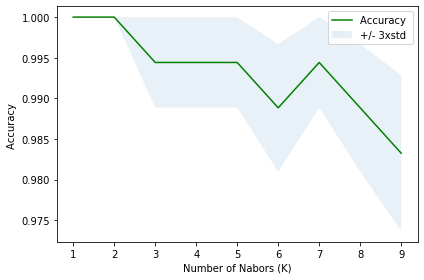

In [157]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [158]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


<h2>Test on Unknown values</h2>

Download unknown values (already prepared)

In [159]:
X_unknown = df.iloc[891:,:]
X_unknown = X_unknown[['PassengerId', 'Survived','Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Female', 'Male', 'C', 'Q', 'S']].values  #.astype(float)

X_unknown

array([[8.920e+02, 0.000e+00, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.930e+02, 0.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [8.940e+02, 0.000e+00, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.307e+03, 0.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.308e+03, 0.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.309e+03, 0.000e+00, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

Predict using the model

In [160]:
yhat_unknown = neigh.predict(X_unknown)
yhat_unknown

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [161]:
yhat_unknown = pd.DataFrame(data=yhat_unknown)
yhat_unknown.columns=["Survived"]
yhat_unknown

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [162]:
answer = df.iloc[891:,:]
answer = answer[['PassengerId']]  #.astype(float)
answer

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [163]:
answer = pd.concat([answer, yhat_unknown], axis=1)

In [164]:
answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [165]:
answer.to_csv("myAnswers",index=False)